## Problem Statement

Using the MNIST data set, create a model that decomposes the eigen values and eigen vectors of the covariance matrix of the data.  Then recreate the images using the top k eigen vectors and explain the variance lost using the eigen values.

### Load Data and Functions:

In [1]:
from numpy.linalg import inv
from scipy.stats import multivariate_normal 
from struct import unpack
import numpy as np
import matplotlib.pylab as plt 
from numpy import log
from numpy import random
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

def loadmnist(imagefile, labelfile):

    # Open the images with gzip in read binary mode
    images = open(imagefile, 'rb')
    labels = open(labelfile, 'rb')

    # Get metadata for images
    images.read(4)  # skip the magic_number
    number_of_images = images.read(4)
    number_of_images = unpack('>I', number_of_images)[0]
    rows = images.read(4)
    rows = unpack('>I', rows)[0]
    cols = images.read(4)
    cols = unpack('>I', cols)[0]

    # Get metadata for labels
    labels.read(4)
    N = labels.read(4)
    N = unpack('>I', N)[0]

    # Get data
    x = np.zeros((N, rows*cols), dtype=np.uint8)  # Initialize numpy array
    y = np.zeros(N, dtype=np.uint8)  # Initialize numpy array
    for i in range(N):
        for j in range(rows*cols):
            tmp_pixel = images.read(1)  # Just a single byte
            tmp_pixel = unpack('>B', tmp_pixel)[0]
            x[i][j] = tmp_pixel
        tmp_label = labels.read(1)
        y[i] = unpack('>B', tmp_label)[0]

    images.close()
    labels.close()
    return (x, y)

def displaychar(image):
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.axis('off')
    plt.show()

In [2]:
%cd ~/Documents/DSE/c1steven/DSE210/MNIST
x,y = loadmnist('train-images-idx3-ubyte','train-labels-idx1-ubyte')
xtest,ytest = loadmnist('t10k-images-idx3-ubyte','t10k-labels-idx1-ubyte')

/Users/cjstev/Documents/DSE/c1steven/DSE210/MNIST


In [3]:
def createEigenValsandVecs(array):
    mycov = np.cov(array.transpose())
    myeig = np.linalg.eig(mycov)
    eigval = myeig[0].real
    eigvec = myeig[1].real
    sort = np.argsort(eigval)[::-1]
    eigval = eigval[sort] ## sort 
    eigvec = eigvec[:,sort] ## sort
    return eigval, eigvec

In [4]:
def varianceLost(k):
    return float(sum(eigval[k:])/sum(eigval))

In [5]:
eigval,eigvec = createEigenValsandVecs(x)

### Information lost:

In [6]:
varianceLost(200),varianceLost(150),varianceLost(100),varianceLost(50),varianceLost(25)

(0.033552652298947515,
 0.051643581185416655,
 0.08537142756049221,
 0.17535313666652694,
 0.3081950912000375)

### Different eigen decomposition for each digit:

In [7]:
list = []
for k in [200,150,100,50,25]:
    sublist = []
    for i in range(10):
        eigval,eigvec = createEigenValsandVecs(x[y==i])        
        sublist.append( varianceLost(k) )
    list.append(sublist)

In [8]:
import pandas as pd
df = pd.DataFrame(list, columns=range(10))
df = df.transpose()
df.columns = [200,150,100,50,25]
df  ## k values are column names, integer is index.  

,200,150,100,50,25
0,0.020953,0.034483,0.059464,0.119590,0.207508
1,0.006705,0.014854,0.030986,0.073012,0.131318
2,0.028351,0.046034,0.078518,0.161913,0.284332
3,0.026178,0.043591,0.076171,0.159073,0.275770
4,0.025570,0.042653,0.073684,0.148018,0.253226
5,0.023850,0.040013,0.070948,0.149749,0.263515
6,0.019147,0.032724,0.057947,0.122372,0.222986
7,0.021417,0.036308,0.063601,0.128934,0.222289
8,0.025176,0.043149,0.077166,0.167942,0.300042
9,0.017133,0.031037,0.057647,0.123549,0.225424


Here the 1 seems to have the least variance lost.  This makes intuitive sense because it is the simplest number

In [9]:
mykvals =  [200,150,100,50,25]

In [10]:
eigval,eigvec = createEigenValsandVecs(x[y==3])

original image:


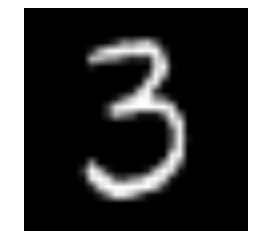

k equals 200:


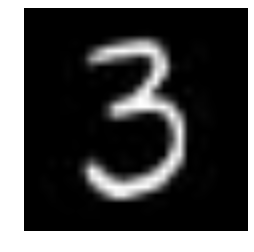

k equals 150:


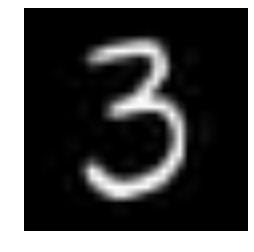

k equals 100:


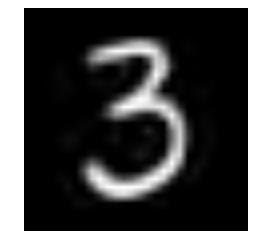

k equals 50:


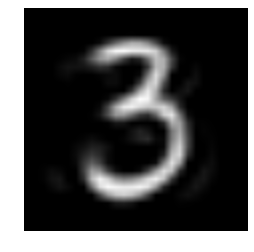

k equals 25:


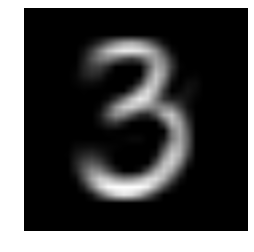

In [11]:
print 'original image:'
displaychar(x[50])
for k in mykvals:
    myU = eigvec.transpose()[:k]
    mySmallDig = np.dot(np.dot(myU.transpose(),myU),x[50])
    ## add clipping
    mySmallDig[mySmallDig < 0] = 0
    mySmallDig[mySmallDig > 255] = 255
    print 'k equals {}:'.format(k)
    displaychar(mySmallDig.real)
    